# 线性函数、线性回归、线性分类 

参考：http://blog.csdn.net/luanpeng825485697/article/details/78933084

线性回归：

线性回归就是**计算回归系数，通过回归系数线性组合属性预测结果值。**

$$f(x)=w^Tx+b$$

二分类的线性分类：

**只不过在线性回归的基础上条件了大于和小于0的判断。**

$$ y= \begin{cases} 1, & \text {f(x)$\geq$0} \\ -1, & \text{f(x)<0} \end{cases} $$

使用线性分类时存在**线性可分和线性不可分。**


比如：下图为线性可分的

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/eed1dfe978e29447ac13ad86f77f5932.png)

当然，也存在着许多线性不可分的情况，例如下图所示

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/8f83806b31b1c992a6b93bc2bb6cb3bd.png)


即使是线性可分的，分类边界也不一定是确定的。

比如下面的几个分类边界都是可以实现分类的，哪个更好呢。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/dd5465c00b80f37b097fb66d33bf929b.png)

这就需要用到支持向量机SVM算法了。

## 支持向量机/SVM ##

SVM（Support Vector Machines）是分类算法中应用广泛、效果不错的一类。

由简至繁SVM可分类为三类：线性可分（linear SVM in linearly separable case）的线性SVM、线性不可分的线性SVM、非线性（nonlinear）SVM。

# 1. 线性可分


对于二类分类问题，训练集$T={(x_1,y_1),(x_2,y_2),⋯,(x_N,y_N)}$，其中$x_i$为输入样本向量，类别$y_i∈{-1,1}$，线性SVM通过学习得到分离超平面（hyperplane）:

$$w⋅x+b=0$$

以及相应的分类决策函数：

$$f(x)=sign(w⋅x+b)$$

其中$sign$为符号函数，将正数映射为1，负数映射为-1。

有如下图所示的分离超平面，哪一个超平面的分类效果更好呢？

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/d49f06e99d682a71fd8b5c43c0d8ba01.png)


直观上，超平面B1的分类效果更好一些。将距离分离超平面最近的两个不同类别的样本点称为支持向量（support vector）的，构成了两条平行于分离超平面的长带，二者之间的距离称之为margin。

显然，margin更大，则分类正确的确信度更高（与超平面的距离表示分类的确信度，距离越远则分类正确的确信度越高）。

通过计算得到（计算过程参考《统计学习方法》115页）

$$margin=\frac{2}{∥w∥}$$

从上图中可观察到：margin以外的样本点对于确定分离超平面没有贡献，换句话说，SVM是有很重要的训练样本（支持向量）所确定的。

至此，SVM分类问题可描述为在全部分类正确的情况下，最大化$\frac{2}{∥w∥}$（等价于最小化$0.5∥w∥^2$）；

线性分类的约束最优化问题转化为如下的凸优化问题。

> $$\min_{w,b}\frac{1}{2}||w||^2$$ $$s.t.\quad \quad           y_i(w\cdot x_i+b)-1 \geq 0$$


在线性可分情况下，训练数据集的样本点中与分离超平面距离最近的样本点的实例称为支持向量。

支持向量满足$$ y_i(w\cdot x_i+b)-1 =0$$

即正样本点满足$$ w\cdot x_i+b=1$$

负样本点满足$$ w\cdot x_i+b=-1$$


# 2. 线性支持向量机


线性可分是理想情形，大多数情况下，由于噪声或特异点等各种原因，训练样本是线性不可分的。

因此，需要更一般化的学习算法。

这时我们就可以通过引入所谓的松弛变量(slack variable)，来允许有些数据点可以处于超平面的错误的一侧。

这样我们的优化目标就能保持仍然不变，但是此时我们的约束条件有所改变。

# 凸优化问题


（a）无约束优化问题，可以写为：

$$min\quad f(x)$$

（b）有等式约束的优化问题，可以写为：

$$min\quad f(x)  \\
s.t. \quad h_i(x)=0 ,i=0,1,2...n$$

（c）有不等式约束的优化问题，可以写为：

$$min\quad f(x)  \\
s.t. \quad g_i(x) \leq 0 ,i=0,1,2...n\\
 h_j(x)=0 ,j=0,1,2...m$$

对于第(a)类的优化问题，常常使用的方法就是费马大定理(Fermat)，即使用求取函数f(x)的导数，然后令其为零，可以求得候选最优值，再在这些候选值中验证；

如果是凸函数，可以保证是最优解。

这也就是我们高中经常使用的求函数的极值的方法。

对于第(b)类的优化问题，常常使用的方法就是拉格朗日乘子法（Lagrange Multiplier) ，即把等式约束h_i(x)用一个系数与f(x)写为一个式子，称为拉格朗日函数，而系数称为拉格朗日乘子。

通过拉格朗日函数对各个变量求导，令其为零，可以求得候选值集合，然后验证求得最优值。

对于第(c)类的优化问题，常常使用的方法就是KKT条件。

同样地，我们把所有的等式、不等式约束与f(x)写为一个式子，也叫拉格朗日函数，系数也称拉格朗日乘子，通过一些条件，可以求出最优值的必要条件，这个条件称为KKT条件。

必要条件和充要条件如果不理解，可以看下面这句话：

 - 事件M的必要条件就是M可以推出的结论 
 - 事件M的充分条件就是可以推出M的前提

了解到这些，现在让我们再看一下我们的最优化问题：

$$\min_w \quad \frac{1}{2} ||w||^2 \\
s.t. \quad y_i(w^Tx_i+b) \geq 1 ,i=0,1,2...n $$

现在，我们的这个对优化问题属于哪一类？很显然，它属于第(c)类问题。

因为，在学习求解最优化问题之前，我们还要学习两个东西：拉格朗日函数和KKT条件。

**拉格朗日函数**

首先，我们先要从宏观的视野上了解一下拉格朗日对偶问题出现的原因和背景。

我们知道我们要求解的是最小化问题，所以一个直观的想法是如果我能够构造一个函数，使得该函数在可行解区域内与原目标函数完全一致，而在可行解区域外的数值非常大，甚至是无穷大，那么这个没有约束条件的新目标函数的优化问题就与原来有约束条件的原始目标函数的优化问题是等价的问题。

这就是使用拉格朗日方程的目的，它将约束条件放到目标函数中，从而将有约束优化问题转换为无约束优化问题。

随后，人们又发现，使用拉格朗日获得的函数，使用求导的方法求解依然困难。

进而，需要对问题再进行一次转换，即使用一个数学技巧：拉格朗日对偶。

所以，显而易见的是，我们在拉格朗日优化我们的问题这个道路上，需要进行下面二个步骤：

 - 将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数

 - 使用拉格朗日对偶性，将不易求解的优化问题转化为易求解的优化


下面是拉格朗日对偶问题的公式，不想推导的记住就行了。

想看推导的参考：https://www.zhihu.com/question/58584814

----------


我们考虑优化问题如下，记作问题（P）。

$$z^* = \min_x f(x)   \\
{s.t. } g_i(x)\leq 0 ,~\forall~ i=1,\ldots,m,x\in X$$

问题（P）的拉格朗日对偶问题（D）写作

$$v^* = \max_{α\geq 0} \min_{x\in X} \underbrace{f(x)+α^T g(x)}_{L(x,α)}$$

其中的函数L(x,α)就是我们熟知的拉格朗日函数。

----------


下面，先将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数

公式变形如下：

$$ L(w,b,α) = \frac{1}{2}||w||^2-\sum_{i=1}^nα_i(y_i(w^Tx_i+b)-1)$$

其中$α_i$是拉格朗日乘子，$α_i$大于等于0，是我们构造新目标函数时引入的系数变量。

其中$αi$是拉格朗日乘子，$αi$大于等于0，是我们构造新目标函数时引入的系数变量(我们自己设置)。

现在我们令：

$$\theta(w) = \max_{α_i≥0} L(w,b,α) $$


当样本点不满足约束条件时，即在可行解区域外：

$$y_i(w^Tx_i+b)<1$$

此时，我们将$αi$设置为正无穷，此时$θ(w)$显然也是正无穷。

当样本点满足约束条件时，即在可行解区域内：

$$y_i(w^Tx_i+b)≥1$$

此时，我们设在$y_i(w^Tx_i+b)>1$时的$αi$为0，在$y_i(w^Tx_i+b)=1$时(也就是支持向量点)的$αi$为大于0的数，那么显然$θ(w)$为原目标函数本身。我们将上述两种情况结合一下，就得到了新的目标函数：

$$ θ(w) = \begin{cases} \frac{1}{2}||w||^2, & \text {x在可行区域} \\ +\infty& \text{x在非可行区域} \end{cases} $$

此时，再看我们的初衷，就是为了建立一个在可行解区域内与原目标函数相同，在可行解区域外函数值趋近于无穷大的新函数，现在我们做到了。


现在，我们的问题变成了求新目标函数的最小值，即：

$$p^* = \min_{w,b}θ(w) = \min_{w,b} \max_{αi≥0}L(w,b,α)$$

这里用p*表示这个问题的最优值，且和最初的问题是等价的。

接下来，我们进行第二步：将不易求解的优化问题转化为易求解的优化


我们看一下我们的新目标函数，先求最大值，再求最小值。

这样的话，我们首先就要面对带有需要求解的参数w和b的方程，而$αi$又是不等式约束，这个求解过程不好做。

所以，我们需要使用拉格朗日函数对偶性，将最小和最大的位置交换一下，这样就变成了：

$$d^* = \max_{α\geq 0} \min_{w,b} L(w,b,α)$$

交换以后的新问题是原始问题的对偶问题，这个新问题的最优值用$d^*$来表示。而且$d^*≤p^*$。我们关心的是$d=p$的时候，这才是我们要的解。需要什么条件才能让$d=p$呢？

 - 首先必须满足这个优化问题是凸优化问题。
 - 其次，需要满足KKT条件。

凸优化问题的定义是：求取最小值的目标函数为凸函数的一类优化问题。目标函数是凸函数我们已经知道，这个优化问题又是求最小值。所以我们的最优化问题就是凸优化问题。

接下里，就是探讨是否满足KKT条件了。

**KKT条件**

我们已经使用拉格朗日函数对我们的目标函数进行了处理，生成了一个新的目标函数。通过一些条件，可以求出最优值的必要条件，这个条件就是接下来要说的KKT条件。

一个最优化模型能够表示成下列标准形式：

$$\min f(x)   \\
s.t. \,\,\, h_j(x)=0,  \,\,\,\,\,\,   j=1,2,3...p, \\
s.t.   \,\,\,\, g_k(x)\leq 0 ,k=1,2,....,q,  \\ 
x \in X \subset R^n $$

优化模型的拉格朗日函数为

$$L(X,λ,μ)=f(X)+\sum_{j=1}^p λ_jh_j(X)+\sum_{k=1}^qμ_kg_k(X)$$

其中$f(x)$是原目标函数，$h_j(x)$是第$j$个等式约束条件，$λ_j$是对应的约束系数，$g_k$是不等式约束，$u_k$是对应的约束系数。

KKT条件的全称是Karush-Kuhn-Tucker条件，KKT条件是说最优值条件必须满足以下条件：

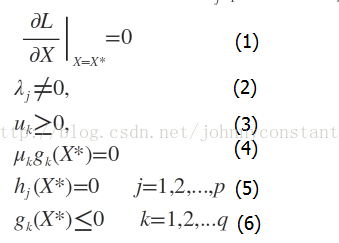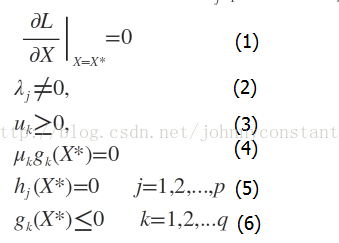

其中$X^*$表示样本点。这些求解条件就是KKT条件。

(1)是对拉格朗日函数取极值时候带来的一个必要条件

(2)是拉格朗日系数约束（同等式情况）

(3)是不等式约束情况

(4)是互补松弛条件

(5)、(6)是原约束条件。

对于一般的任意问题而言，KKT条件是使一组解成为最优解的必要条件，当原问题是凸问题的时候，KKT条件也是充分条件。

对于我们的优化问题：

$$\min_w \quad \frac{1}{2} ||w||^2 \\
s.t. \quad y_i(w^Tx_i+b) \geq 1 ,i=0,1,2...n $$

显然，条件二已经满足了。另外两个条件为啥也满足呢？

这里原谅我省略一系列证明步骤，感兴趣的可以移步这里：[点我查看](https://blog.csdn.net/xianlingmao/article/details/7919597)

这里已经给出了很好的解释。现在，凸优化问题和KKT都满足了，问题转换成了对偶问题。而求解这个对偶学习问题，可以分为三个步骤：

首先要让L(w,b,α)关于w和b最小化

然后求对α的极大

最后利用SMO算法求解对偶问题中的拉格朗日乘子。

现在，我们继续推导。

**对偶问题求解**

第一步：根据上述推导已知：

$$ L(w,b,α) = \frac{1}{2}||w||^2-\sum_{i=1}^nα_i(y_i(w^Tx_i+b)-1)$$

首先固定$α$，要让$L(w,b,α)$关于$w$和$b$最小化，我们分别对$w$和$b$偏导数，令其等于0，即：

$$ \frac{d L}{d w} = 0 \implies w = \sum_{i=1}^n α_iy_ix_i$$
$$ \frac{d L}{d b} = 0 \implies  \sum_{i=1}^n α_iy_i=0$$

将上述结果带回$L(w,b,α)$得到

$$L(w,b,α) = \sum_{i=1}^n α_i-0.5*\sum_{i,j=1}^n α_iα_jy_iy_jx_i^Tx_j$$

从上面的最后一个式子，我们可以看出，此时的$L(w,b,α)$函数只含有一个变量，即$α_i$。

第二步：

现在内侧的最小值求解完成，我们求解外侧的最大值，从上面的式子得到

$$\max_α\sum_{i=1}^n α_i-\frac{1}{2}\sum_{i,j=1}^n α_iα_jy_iy_jx_i^Tx_j \\
s.t. \,\,\,\,  α_i\geq0,i=1,2...n,  \\
\sum_{i=1}^n α_iy_i=0$$

现在我们的优化问题变成了如上的形式。对于这个问题，我们有更高效的优化算法，即序列最小优化（SMO）算法。

我们通过这个优化算法能得到α，再根据α，我们就可以求解出w和b，进而求得我们最初的目的：找到超平面，即"决策平面"。

而上式可以等价于
$$ \min_α \frac{1}{2}\sum_{i,j=1}^n α_iα_jy_iy_jx_i^Tx_j  -\sum_{i=1}^n α_i\\
s.t. \,\,\,\,  α_i\geq0,i=1,2...n,  \\
\sum_{i=1}^n α_iy_i=0$$


总结一句话：我们为啥使出吃奶的劲儿进行推导？因为我们要将最初的原始问题，转换到可以使用SMO算法求解的问题，这是一种最流行的求解方法。

**SMO算法**

SMO算法的目标是求出一系列$α_i$和$b$，一旦求出了这些$α_i$，就很容易计算出权重向量w并得到分隔超平面。

SMO算法的工作原理是：

每次循环中选择两个$α_i$进行优化处理。一旦找到了一对合适的$α_i$，那么就增大其中一个同时减小另一个。

这里所谓的"合适"就是指两个$α_i$必须符合以下两个条件，条件之一就是两个$α_i$必须要在间隔边界之外，而且第二个条件则是这两个$α_i$还没有进行过区间化处理或者不在边界上。


**SMO算法的解法**

先来定义特征到结果的输出函数为：

$$u=w^Tx+b$$
接着，我们回忆一下原始优化问题，如下：

$$\min_w \quad \frac{1}{2} ||w||^2 \\
s.t. \quad y_i(w^Tx_i+b) \geq 1 ,i=0,1,2...n $$

求导得：

$$w = \sum_{i=1}^n α_iy_ix_i$$
将上述公式带入输出函数中：

$$u = \sum_{i=1}^n α_iy_ix_i^Tx+b$$

与此同时，拉格朗日对偶后得到最终的目标化函数：

$$ \min_α \frac{1}{2}\sum_{i,j=1}^n α_iα_jy_iy_jx_i^Tx_j  -\sum_{i=1}^n α_i\\
s.t. \,\,\,\,  α_i\geq0,i=1,2...n,  \\
\sum_{i=1}^n α_iy_i=0$$

**线性支持下的SMO**

实际上，对于上述目标函数，是存在一个假设的，即数据100%线性可分。但是，目前为止，我们知道几乎所有数据都不那么"干净"。

这时我们就可以通过引入所谓的松弛变量(slack variable)，来允许有些数据点可以处于超平面的错误的一侧。

这样我们的优化目标就能保持仍然不变，但是此时我们的约束条件有所改变：

$$ s.t.\quad C\geqα_i\geq0,i=1,2...n,  \\
\sum_{i=1}^n α_iy_i=0$$

根据KKT条件可以得出其中$αi$取值的意义为：

$$α_i = 0  \iff  y_iu_i\geq1$$
$$0<α_i <C \iff  y_iu_i=1$$
$$α_i = C  \iff  y_iu_i\leq1$$

 - 对于第1种情况，表明$αi$是正常分类，在边界内部；
 - 对于第2种情况，表明$αi$是支持向量，在边界上；
 - 对于第3种情况，表明$αi$是在两条边界之间。

而最优解需要满足KKT条件，即上述3个条件都得满足，以下几种情况出现将会不满足

$$y_iu_i\leq1   \quad  α_i <C $$
$$y_iu_i\geq1 \quad  α_i > 0$$
$$ y_iu_i=1   \quad   α_i = 0 或者 α_i =C $$

也就是说，如果存在不能满足KKT条件的$αi$，那么需要更新这些$αi$，这是第一个约束条件。此外，更新的同时还要受到第二个约束条件的限制，即：

$$\sum_{i=1}^n α_iy_i=0$$

因为这个条件，我们同时更新两个$α$值，因为只有成对更新，才能保证更新之后的值仍然满足和为0的约束，假设我们选择的两个乘子为$α_1$和$α_2$：
$$α_1^{new}y_1+α_2^{new}y_2 = α_1^{old}y_1+α_2^{old}y_2 = \zeta$$

其中， $ \zeta$为常数。因为两个因子不好同时求解，所以可以先求第二个乘子$α_2$的解$(α_2^{new})$，得到$α_2$的解$(α_2^{new})$之后，再用$α_2$的解$(α_2^{new})$表示$α_1$的解$(α_1^{new})$。为了求解$(α_2^{new})$ ，得先确定$(α_2^{new})$的取值范围。假设它的上下边界分别为H和L，那么有：

$$L\leqα_2^{new}\leq H$$


接下来，综合下面两个条件：


$$ C\geqα_i\geq0,i=1,2...n,  \\
α_1^{new}y_1+α_2^{new}y_2 = α_1^{old}y_1+α_2^{old}y_2 = \zeta$$

当y1不等于y2时，即一个为正1，一个为负1的时候，可以得到：

$$α_1^{old}-α_2^{old}= \zeta$$

所以有：

$$L=max(0, \zeta),H=min(C,C-\zeta)$$

此时，取值范围如下图所示：

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/13177dc74a0bb338f2c3346a1acab3af.png)

当y1等于y2时，即两个都为正1或者都为负1，可以得到：

$$α_1^{old}+α_2^{old}= \zeta$$

所以有：

$$L=max(0, \zeta-C),H=min(C,\zeta)$$

此时，取值范围如下图所示：

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/e4266fbaf02752b9a89b70c6e8db12d7.png)

如此，根据y1和y2异号或同号，可以得出$α_2^{new}$的上下界分别为：
$$L=max(0, α_2^{old}-α_1^{old}),H=min(C,C+α_2^{old}-α_1^{old})  \qquad if \quad  y_1 \neq y_2$$
$$L=max(0, α_1^{old}+α_2^{old}-C),H=min(C,α_1^{old}+α_2^{old})  \qquad if \quad  y_1=y_2$$

这个界限就是编程的时候需要用到的。已经确定了边界，接下来，就是推导迭代式，用于更新 $α$值。

我们已经知道，更新$α$的边界，接下来就是讨论如何更新$α$值。我们依然假设选择的两个乘子为$α_1$和$α_2$。(推导略)

$$ α_2^{new,clipped}= \begin{cases} H, & α_2^{new}>H \\  α_2^{new}, & L\leq α_2^{new}\leq H  \\ L, & α_2^{new}<L \end{cases} $$

$$ α_1^{new}= α_1^{old}+y_1y_2(α_2^{old}-α_2^{new,clipped})  $$

这样，我们就知道了怎样计算$α_1$和$α_2$了，也就是如何对选择的α进行更新。

我们要根据$ α$ 的取值范围，去更正b的值，使间隔最大化。当$α_1^{new}$在0和C之间的时候，根据KKT条件可知，这个点是支持向量上的点。因此，满足下列公式：

$$ y_1(w^Tx_1+b)= 1  $$

公式两边同时乘以$y_1$得($y_1\times y_1=1$)：

$$  \sum_{i=1}^nα_iy_ix_ix_1+b=y_1$$

因为我们是根据$α_1$和$α_2$的值去更新b，所以单独提出i=1和i=2的时候，整理可得：

$$  b_1^{new} = y_1-\sum_{i=3}^nα_iy_ix_i^Tx_1-α_1^{new}y_1x_1^Tx_1-α_2^{new}y_2x_2^Tx_1$$

其中前两项为：

$$y_1-\sum_{i=3}^nα_iy_ix_i^Tx_1=-E_1+α_1^{old}y_1x_1^Tx_1+α_2^{old}y_2x_2^Tx_1+b^{old}$$

将上述两个公式，整理得：

$$  b_1^{new} =b^{old}-E_1-y_1(α_1^{new}-α_1^{old})x_1^Tx_1-y_2(α_2^{new}-α_2^{old})x_2^Tx_1$$

同理可得$b_2^{new}$为：

$$  b_2^{new} =b^{old}-E_2-y_1(α_1^{new}-α_1^{old})x_1^Tx_2-y_2(α_2^{new}-α_2^{old})x_2^Tx_2$$

当我们更新了$α_1$和$α_2$之后，需要重新计算阈值b，因为b关系到了我们$f(x)$的计算，也就关系到了误差Ei的计算。

$$ b= \begin{cases} b_1, & 0<α_1^{new}<C \\  b_2, & 0<α_2^{new}<C \leq H  \\ (b_1+b_2)/2, & otherwise \end{cases} $$

**现在，让我们梳理下SMO算法的步骤：**

步骤1：计算误差：

$$E_i=f(x_i)-y_i=\sum_{j=1}^nα_jy_jx_i^Tx_j+b-y_i$$

步骤2：计算上下界L和H：

$$L=max(0, α_j^{old}-α_i^{old}),H=min(C,C+α_j^{old}-α_i^{old})  \qquad if \quad  y_i \neq y_j$$
$$L=max(0, α_j^{old}+α_i^{old}-C),H=min(C,α_j^{old}+α_i^{old})  \qquad if \quad  y_j=y_i$$

步骤3：计算$η$：

$$η = x_i^Tx_i+x_j^Tx_j-2x_i^Tx_j$$

步骤4：更新$α_j$：

$$α_j^{new}=α_j^{old}+\frac{y_j(E_i-E_j)}{η }$$

步骤5：根据取值范围修剪$α_j$

$$ α_j^{new,clipped}= \begin{cases} H, & α_j^{new}>H \\  α_j^{new}, & L\leq α_j^{new}\leq H  \\ L, & α_j^{new}<L \end{cases} $$

步骤6：更新$α_i$：

$$ α_i^{new}= α_i^{old}+y_iy_j(α_j^{old}-α_j^{new,clipped})  $$


步骤7：更新b1和b2：

$$  b_1^{new} =b^{old}-E_i-y_i(α_i^{new}-α_i^{old})x_i^Tx_i-y_j(α_j^{new}-α_j^{old})x_j^Tx_i$$

$$  b_2^{new} =b^{old}-E_j-y_i(α_i^{new}-α_i^{old})x_i^Tx_j-y_j(α_j^{new}-α_j^{old})x_j^Tx_j$$

步骤8：根据b1和b2更新b：

$$ b= \begin{cases} b_1, & 0<α_1^{new}<C \\  b_2, & 0<α_2^{new}<C \leq H  \\ (b_1+b_2)/2, & otherwise \end{cases} $$